# code

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ecommerce_customer_behavior_dataset.csv')  #loading csv data set
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [3]:
df.info() #review the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [4]:
df.isnull().sum() #check null values

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

In [5]:
print(df.duplicated().sum()) #checking any duplicate value


0


In [8]:
print(df.describe(include='all'))  #view basic statistics

        Customer ID           Age Gender Location Product Category  \
count   10000.00000  10000.000000  10000    10000            10000   
unique          NaN           NaN      3        8                8   
top             NaN           NaN   Male   Khulna      Electronics   
freq            NaN           NaN   3349     1291             1309   
mean     5000.50000     43.789900    NaN      NaN              NaN   
std      2886.89568     15.005521    NaN      NaN              NaN   
min         1.00000     18.000000    NaN      NaN              NaN   
25%      2500.75000     31.000000    NaN      NaN              NaN   
50%      5000.50000     44.000000    NaN      NaN              NaN   
75%      7500.25000     57.000000    NaN      NaN              NaN   
max     10000.00000     69.000000    NaN      NaN              NaN   

        Purchase Amount ($)  Time Spent on Website (min) Device Type  \
count          10000.000000                 10000.000000       10000   
unique         

Q1: Find Mean, Median, and Mode (Age)

In [3]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]  

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Mode Age:", mode_age)


Mean Age: 43.7899
Median Age: 44.0
Mode Age: 51


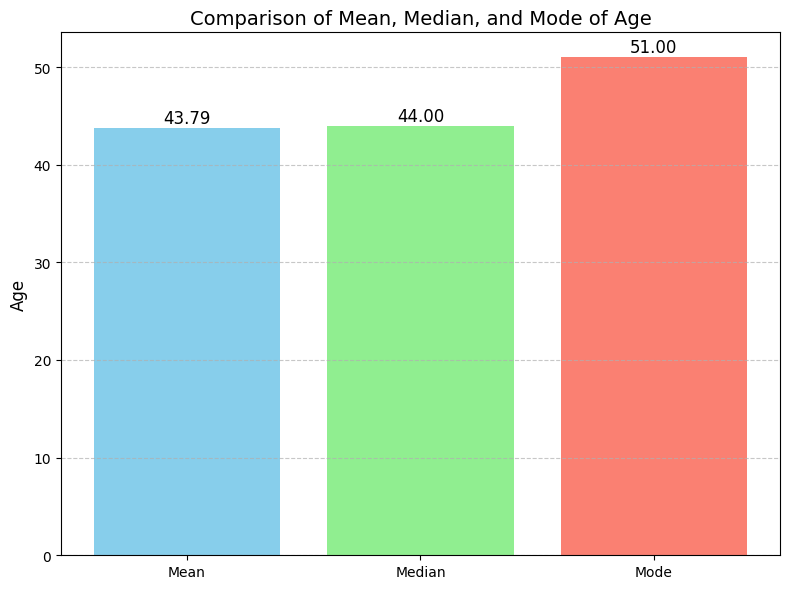

In [10]:
# Data for the chart
statistics = ['Mean', 'Median', 'Mode']
values = [mean_age, median_age, mode_age]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(statistics, values, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', 
             ha='center', fontsize=12)

plt.title('Comparison of Mean, Median, and Mode of Age', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [33]:
from scipy.stats import zscore

# Variance
variance = df['Purchase Amount ($)'].var()

# Standard Deviation
std_dev = df['Purchase Amount ($)'].std()

# Z-score
df['Z-score (Purchase Amount)'] = zscore(df['Purchase Amount ($)'])

print("Variance:", variance)
print("Standard Deviation:", std_dev)
print(df[['Purchase Amount ($)', 'Z-score (Purchase Amount)']].head())


Variance: 81932.24073019299
Standard Deviation: 286.23808399685913
   Purchase Amount ($)  Z-score (Purchase Amount)
0               202.54                  -1.052856
1               655.94                   0.531219
2               963.65                   1.606287
3               485.59                  -0.063945
4               143.27                  -1.259932


A z-score (also called a standard score) measures how many standard deviations a data point is from the mean of a dataset. It is used in statistics to compare different data points within a normally distributed dataset.

the formula of z score is:  z= (x-μ)/σ


 
where:

X = the data point
μ = the mean of the dataset
σ = the standard deviation of the dataset


Interpretation:
z = 0: The data point is equal to the mean.

z > 0: The data point is above the mean.

z < 0: The data point is below the mean.

Higher absolute z-score: The data point is farther from the mean (more unusual).

### Q3-What are the top three product categories based on the number of purchases?

In [6]:
unique_categories = df['Product Category'].unique()
print(unique_categories)

['Toys' 'Sports' 'Home' 'Beauty' 'Books' 'Groceries' 'Electronics'
 'Clothing']


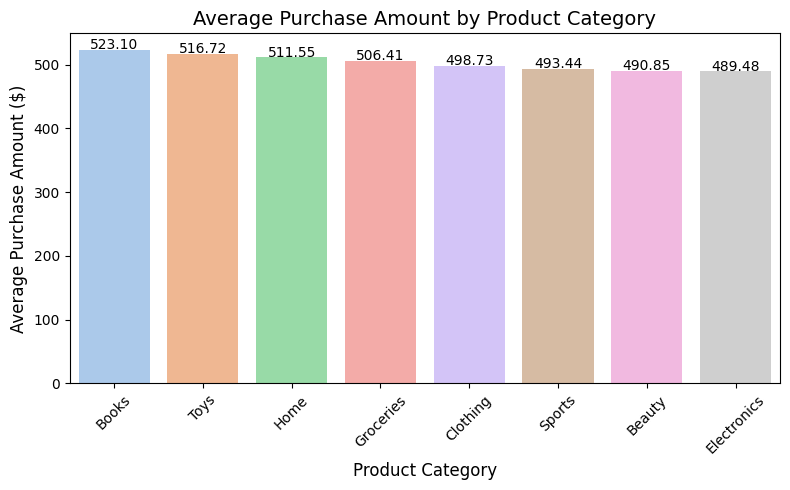

In [8]:
# Group by Product Category and calculate average purchase amount
avg_purchase = df.groupby('Product Category')['Purchase Amount ($)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_purchase.index, y=avg_purchase.values, palette='pastel')

# Labels and title
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Purchase Amount ($)', fontsize=12)
plt.title('Average Purchase Amount by Product Category', fontsize=14)
plt.xticks(rotation=45)

# Show values on top of bars
for i, val in enumerate(avg_purchase.values):
    plt.text(i, val + 1, f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [4]:
df.groupby('Product Category')['Purchase Amount ($)'].sum().sort_values(ascending=False).head(3)



Product Category
Toys     665535.38
Books    664338.38
Home     647106.92
Name: Purchase Amount ($), dtype: float64

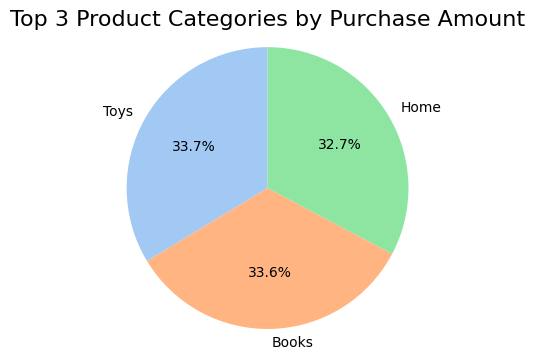

In [35]:


top_categories = df.groupby('Product Category')['Purchase Amount ($)'].sum().sort_values(ascending=False).head(3)

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(top_categories, 
        labels=top_categories.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=sns.color_palette('pastel'))

plt.title('Top 3 Product Categories by Purchase Amount', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()


### Q4- How many customers are classified as return customers?

In [36]:
total_return_customers = df['Return Customer'].sum()
print(f"Total Return Customers: {total_return_customers}")

Total Return Customers: 4996


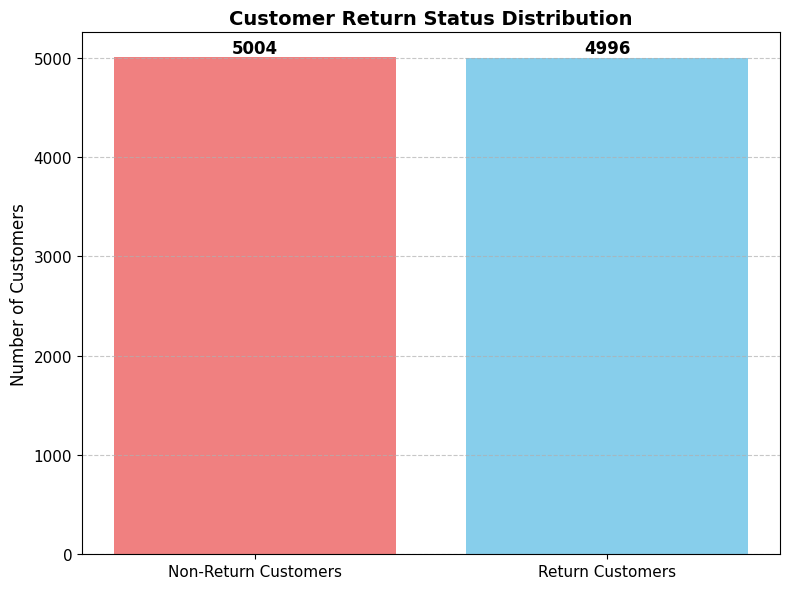

In [14]:
# Calculate number of return and non-return customers
return_counts = df['Return Customer'].value_counts()
labels = ['Non-Return Customers', 'Return Customers']
counts = [return_counts.get(False, 0), return_counts.get(True, 0)]

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['lightcoral', 'skyblue'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Styling
plt.title('Customer Return Status Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Q5: What is the average Review Score given by customers?

In [37]:
average_review_score = df['Review Score (1-5)'].mean()
print(f"Average Review Score: {average_review_score}")

Average Review Score: 2.9951


### Q6: How does the average delivery time vary between subscription statuses (Free,Premium)? 


In [38]:
print("Data type of 'Delivery Time (days)':", df['Delivery Time (days)'].dtype)

Data type of 'Delivery Time (days)': int64


In [39]:
# Filter Subscription Status for Free and Premium only
filtered_df = df[df['Subscription Status'].isin(['Free', 'Premium'])] 



average_delivery_time_by_subscription = filtered_df.groupby('Subscription Status')['Delivery Time (days)'].mean().reset_index()
average_delivery_time_by_subscription


,Subscription Status,Delivery Time (days)
0,Free,6.963924
1,Premium,7.070347


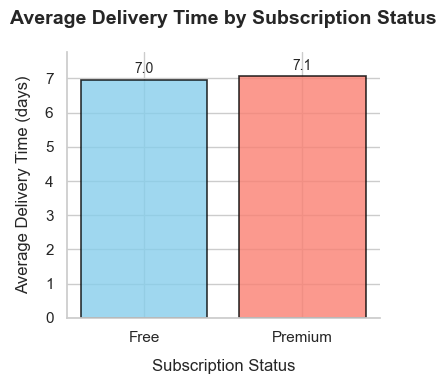

In [40]:


# Set style (optional)
sns.set_theme(style="whitegrid")  # Cleaner background with grid lines

# Create figure
plt.figure(figsize=(4, 4))  # Adjusted for better aspect ratio

# Custom colors for each bar
colors = ['skyblue' if status == 'Free' else 'salmon' for status in average_delivery_time_by_subscription['Subscription Status']]

# Plot bars with enhancements
bars = plt.bar(
    x=average_delivery_time_by_subscription['Subscription Status'],
    height=average_delivery_time_by_subscription['Delivery Time (days)'],
    color=colors,
    edgecolor='black',  # Add borders to bars
    linewidth=1.2,
    alpha=0.8  # Slight transparency
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (center of bar)
        height + 0.1,  # Y-position (slightly above bar)
        f'{height:.1f}',  # Format to 1 decimal place
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10
    )

# Customize titles and labels
plt.xlabel('Subscription Status', fontsize=12, labelpad=10)
plt.ylabel('Average Delivery Time (days)', fontsize=12, labelpad=10)
plt.title('Average Delivery Time by Subscription Status', fontsize=14, pad=20, weight='bold')

# Adjust y-axis to start from 0 for better comparison
plt.ylim(0, max(average_delivery_time_by_subscription['Delivery Time (days)']) * 1.1)  # 10% buffer

# Remove top and right spines (optional)
sns.despine()

# Rotate x-labels if needed (e.g., long labels)
plt.xticks(rotation=0)  # Options: 45, 'horizontal', etc.

# Show plot
plt.tight_layout()  # Prevent label clipping
plt.show()

### Q7: How many customers are subscribed to the service?

In [41]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-score (Purchase Amount)
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052856
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531219
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606287
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063945
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259932


In [18]:
df["Subscription Status"].unique()

array(['Free', 'Premium', 'Trial'], dtype=object)

Here subscription Status = 'premium', considered as suscribed by the customer

In [19]:
# the number of rows where the 'Subscription Status' column is 'Subscribed'.
subscribed_customers_count = df[df['Subscription Status'] == 'Premium'].shape[0]

print(f"Number of customers subscribed to the service: {subscribed_customers_count}")

Number of customers subscribed to the service: 3369


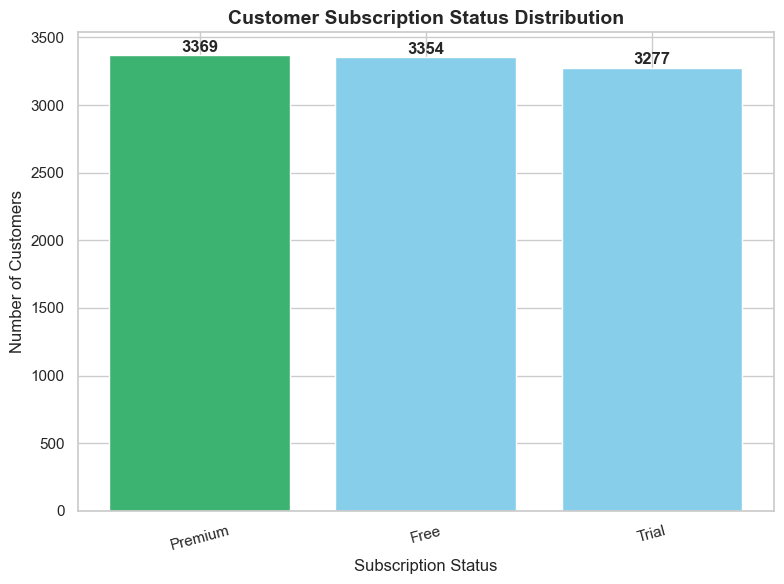

In [24]:
sns.set(style="whitegrid")

# Count all subscription status types
subscription_counts = df['Subscription Status'].value_counts()

# Define colors: highlight 'Premium'
colors = ['skyblue' if status != 'Premium' else 'mediumseagreen' for status in subscription_counts.index]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(subscription_counts.index, subscription_counts.values, color=colors)

# Annotate each bar with the count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Customer Subscription Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()




### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop, Tablet)


In [44]:
# Count the total number of purchases
total_purchases = df.shape[0]
total_purchases

10000

In [45]:
# Get the counts for each device type
device_type_counts = df['Device Type'].value_counts()
device_type_counts



Device Type
Mobile     3374
Desktop    3348
Tablet     3278
Name: count, dtype: int64

In [46]:
# Calculate the percentage for each device type
device_type_percentages = (device_type_counts / total_purchases) * 100
device_type_percentages
print(device_type_percentages.apply(lambda x: f"{x:.2f}%"))



Device Type
Mobile     33.74%
Desktop    33.48%
Tablet     32.78%
Name: count, dtype: object


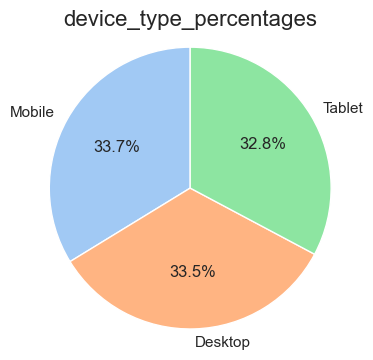

In [47]:
plt.figure(figsize=(4,4))
plt.pie(device_type_percentages, 
        labels=device_type_percentages.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=sns.color_palette('pastel'))

plt.title('device_type_percentages', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

### Q9: What is the average purchase amount for customers who availed discounts compared to those who didnʼt?


In [49]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-score (Purchase Amount)
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052856
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531219
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606287
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063945
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259932


In [50]:
average_purchase=df.groupby("Discount Availed")["Purchase Amount ($)"].mean()
average_purchase.index=["Discount not available","Discount availabe"]

print("Average Purchase Amount:")
print(average_purchase)

Average Purchase Amount:
Discount not available    502.511451
Discount availabe         505.264178
Name: Purchase Amount ($), dtype: float64


Average Purchase Amount:
Discount not available    502.511451
Discount available        505.264178
Name: Purchase Amount ($), dtype: float64


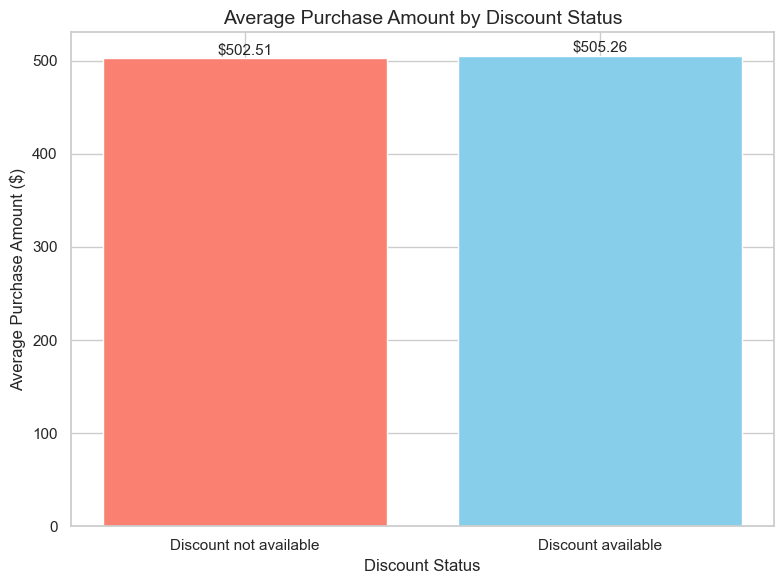

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by discount status and calculate average purchase amount
average_purchase = df.groupby("Discount Availed")["Purchase Amount ($)"].mean()

# Rename the index values for better readability
average_purchase.index = ["Discount not available", "Discount available"]

# Display the result
print("Average Purchase Amount:")
print(average_purchase)

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(average_purchase.index, average_purchase.values, color=["salmon", "skyblue"])
plt.title("Average Purchase Amount by Discount Status", fontsize=14)
plt.ylabel("Average Purchase Amount ($)", fontsize=12)
plt.xlabel("Discount Status", fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f"${height:.2f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()



### Q10: What is the most common payment method used by customers?

In [32]:
payment_method=df["Payment Method"].value_counts()

print("payment method is:",payment_method)

payment method is: Payment Method
Bank Transfer       2067
Credit Card         2028
Cash on Delivery    2007
Debit Card          1983
PayPal              1915
Name: count, dtype: int64


In [33]:
# Most common payment method
most_common_method = df['Payment Method'].mode()[0]

print("Most common payment method:", most_common_method)

Most common payment method: Bank Transfer


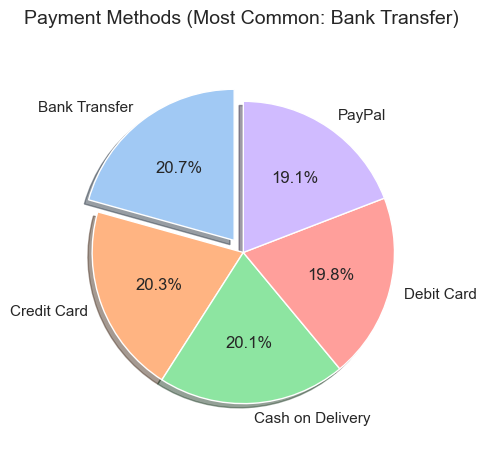

In [35]:
# Assuming `payment_method` is a Series with method names as index and their counts as values
# Example: payment_method = df['Payment Method'].value_counts()

# Identify the index of the maximum value
explode = [0.1 if i == payment_method.argmax() else 0 for i in range(len(payment_method))]

# Plot
plt.figure(figsize=(5, 5))
plt.pie(payment_method,
        labels=payment_method.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        explode=explode,
        shadow=True)

# Title with most common method highlighted
most_common = payment_method.idxmax()
plt.title(f'Payment Methods (Most Common: {most_common})', fontsize=14)
plt.axis('equal')  # Keeps pie circular

plt.tight_layout()
plt.show()


## Level 2: Intermediate Insights

### Q1: What are the average review scores of users of the most common payment method?

In [37]:
# Find the most common payment method
most_common_payment = df['Payment Method'].mode()[0]

# Filter the DataFrame to include only users with the most common payment method
df_most_common_payment = df[df['Payment Method'] == most_common_payment]

df_most_common_payment.head()



,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
16,17,39,Male,Chittagong,Clothing,920.47,19,Desktop,Bank Transfer,True,6,True,4,13,Trial,High
17,18,21,Female,Mymensingh,Electronics,375.84,50,Tablet,Bank Transfer,False,4,False,5,8,Premium,Medium


In [39]:
# Calculate the average review score for these users
average_review_score = df_most_common_payment['Review Score (1-5)'].mean()


# Print the result
print(f"The most common payment method is: {most_common_payment}")
print(f"The average review score for users of this payment method is: {average_review_score}")

The most common payment method is: Bank Transfer
The average review score for users of this payment method is: 2.9888727624576683


The most common payment method is: Bank Transfer
The average review score for users of this payment method is: 2.99


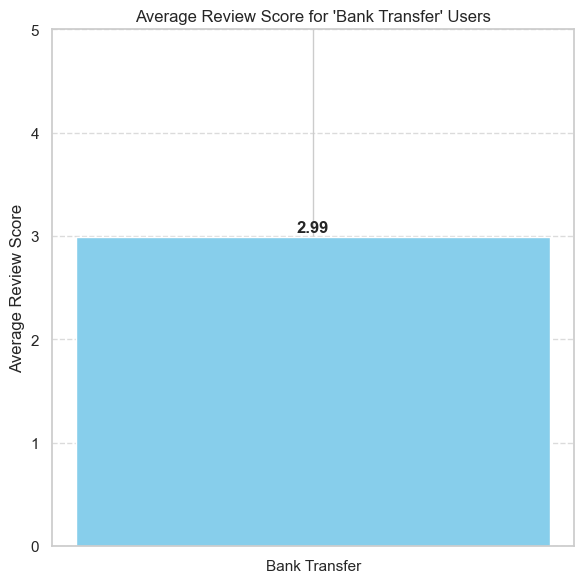

In [40]:
# Calculate average review score
average_review_score = df_most_common_payment['Review Score (1-5)'].mean()

# Print results
print(f"The most common payment method is: {most_common_payment}")
print(f"The average review score for users of this payment method is: {average_review_score:.2f}")

# Draw bar chart
plt.figure(figsize=(6, 6))
bar = plt.bar([most_common_payment], [average_review_score], color='skyblue')

# Highlight value on bar
for b in bar:
    plt.text(b.get_x() + b.get_width() / 2, b.get_height() + 0.05, 
             f"{b.get_height():.2f}", 
             ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.ylabel("Average Review Score")
plt.title(f"Average Review Score for '{most_common_payment}' Users")
plt.ylim(0, 5)  # Since review scores are typically on a 1-5 scale

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Q2-What is the correlation between time spent on the website and purchase amount?Do 
customers who spend more time on the website purchase more items?

In [86]:
# Calculate correlation between time spent and purchase amount
correlation = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])

# Print correlation with interpretation
print(f"Correlation between 'Time Spent on Website' and 'Purchase Amount': {correlation:.3f}")

# Optional: Add basic interpretation
if correlation > 0.7:
    interpretation = "Strong positive correlation"
elif correlation > 0.3:
    interpretation = "Moderate positive correlation"
elif correlation > 0:
    interpretation = "Weak positive correlation"
elif correlation < -0.7:
    interpretation = "Strong negative correlation"
elif correlation < -0.3:
    interpretation = "Moderate negative correlation"
elif correlation < 0:
    interpretation = "Weak negative correlation"
else:
    interpretation = "No correlation"

print(f"Interpretation: {interpretation}")


Correlation between 'Time Spent on Website' and 'Purchase Amount': 0.010
Interpretation: Weak positive correlation


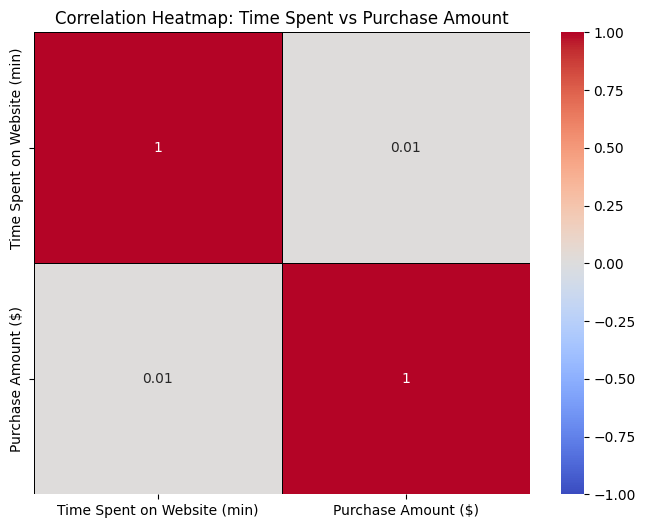

In [3]:

corr_matrix = df[['Time Spent on Website (min)', 'Purchase Amount ($)']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            linewidths=0.5, 
            linecolor='black')

plt.title('Correlation Heatmap: Time Spent vs Purchase Amount')
plt.show()

In [87]:
#  Do customers who spend more time on the website purchase more items?

print("\nCorrelation Analysis Results:")
print(f"Correlation Coefficient: {correlation:.3f}")  # Display the actual correlation value with 3 decimal places

if abs(correlation) > 0.7:
    strength = "strong"
elif abs(correlation) > 0.3:
    strength = "moderate"
elif abs(correlation) > 0.1:
    strength = "weak"
else:
    strength = "no meaningful"

if correlation > 0.1:
    print(f"\nThere is a {strength} positive correlation (r = {correlation:.3f}),")
    print("suggesting that customers who spend more time on the website tend to purchase more items.")
elif correlation < -0.1:
    print(f"\nThere is a {strength} negative correlation (r = {correlation:.3f}),")
    print("suggesting that customers who spend more time on the website tend to purchase fewer items.")
else:
    print("\nThere is no significant correlation between time spent on the website and purchase amount.")
    print(f"(Correlation coefficient: {correlation:.3f})")



Correlation Analysis Results:
Correlation Coefficient: 0.010

There is no significant correlation between time spent on the website and purchase amount.
(Correlation coefficient: 0.010)


“there is no significant correlation between time spent on the website and purchase amount” — it means:

👉 Customers who spend more time on the website do not necessarily purchase more items or spend more money

Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return 
customers?

In [10]:
# Define satisfied customers as those with a review score of 4 or 5
satisfied_customers = df[df['Review Score (1-5)'].isin([4, 5])]

# Find customers who are both satisfied and return customers
satisfied_and_return_customers = df[(df['Review Score (1-5)'].isin([4, 5])) & (df['Return Customer'] == True)]

# Calculate the percentage of satisfied and return customers
percentage_satisfied_and_return = (len(satisfied_and_return_customers) / len(df)) * 100
print(f"Percentage of customers who are satisfied and are also Return Customers: {percentage_satisfied_and_return:.2f}%")

Percentage of customers who are satisfied and are also Return Customers: 20.08%


Q4: What is the relationship between the number of items purchased and customer 
satisfaction?

In [90]:
# Correlation between items purchased and customer satisfaction 

# as the column Customers Satisfavtion has object data types so to find co-relation between them we first need to convert them to numeric by using maping
# Define the mapping
satisfaction_map = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply the mapping
df['satisfaction_numeric'] = df['Customer Satisfaction'].map(satisfaction_map)

df[['Customer Satisfaction', 'satisfaction_numeric']].head()


,Customer Satisfaction,satisfaction_numeric
0,Low,0
1,Medium,1
2,Medium,1
3,Medium,1
4,High,2


In [92]:
# Calculate correlation
correlation = df['Number of Items Purchased'].corr(df['satisfaction_numeric'])

# Print the correlation result with interpretation
print(f"Correlation between 'Number of Items Purchased' and 'Satisfaction': {correlation:.2f}")

# Interpret the correlation strength
if correlation > 0.7:
    interpretation = "strong positive"
elif correlation > 0.3:
    interpretation = "moderate positive"
elif correlation > 0.1:
    interpretation = "weak positive"
elif correlation > -0.1:
    interpretation = "no or very weak"
elif correlation > -0.3:
    interpretation = "weak negative"
elif correlation > -0.7:
    interpretation = "moderate negative"
else:
    interpretation = "strong negative"

print(f"This indicates a {interpretation} correlation between the number of items purchased and customer satisfaction.")


Correlation between 'Number of Items Purchased' and 'Satisfaction': -0.01
This indicates a no or very weak correlation between the number of items purchased and customer satisfaction.


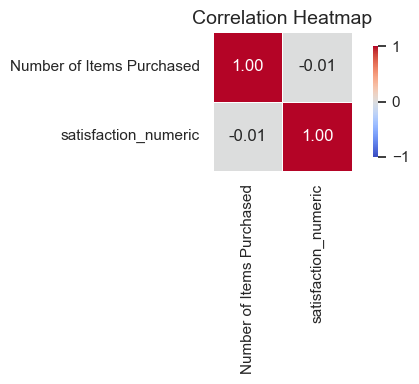

In [98]:
# Select the two relevant columns
corr_matrix = df[['Number of Items Purchased', 'satisfaction_numeric']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Draw the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,          # Show correlation values
    fmt=".2f",           # Format values to 2 decimal places
    cmap="coolwarm",     # Color map for better contrast
    vmin=-1, vmax=1,     # Fix scale for consistency
    linewidths=0.5, 
    square=True,
    cbar_kws={"shrink": .8}
)

# Title
plt.title("Correlation Heatmap", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Q5: Which location has the 2nd highest average purchase amount?

In [103]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-score (Purchase Amount),Time Bins,satisfaction_numeric
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052856,"(35.8, 47.4]",0
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531219,"(24.2, 35.8]",1
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606287,"(0.942, 12.6]",1
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063945,"(35.8, 47.4]",1
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259932,"(12.6, 24.2]",2


In [109]:
# Group by location and calculate average purchase amount
avg_purchase_by_location = df.groupby('Location')['Purchase Amount ($)'].mean()

sorted_avg = avg_purchase_by_location.sort_values(ascending=False)



# Get the second highest
second_highest_location = sorted_avg.index[1]
second_highest_value = sorted_avg.iloc[1]

print(f"The location with the 2nd highest average purchase amount is: {second_highest_location} (${second_highest_value:.2f})")

The location with the 2nd highest average purchase amount is: Barisal ($513.67)


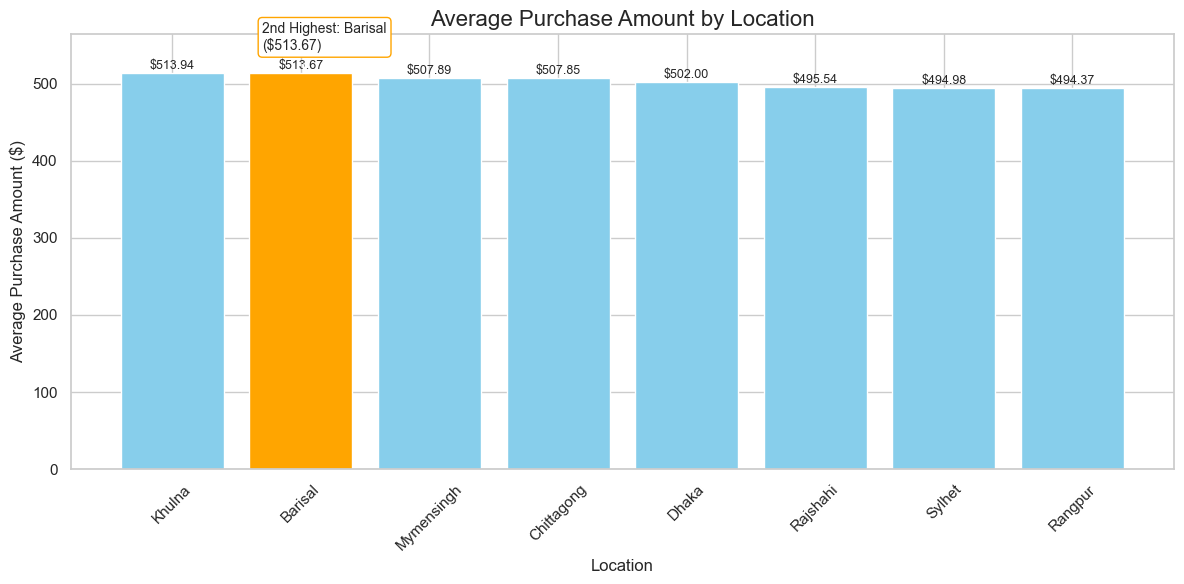

In [50]:
# Group and sort
avg_purchase_by_location = df.groupby('Location')['Purchase Amount ($)'].mean()
sorted_avg = avg_purchase_by_location.sort_values(ascending=False)

# Identify 2nd highest
second_highest_location = sorted_avg.index[1]
second_highest_value = sorted_avg.iloc[1]

# Color setup: highlight 2nd highest
colors = ['skyblue' if loc != second_highest_location else 'orange' for loc in sorted_avg.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sorted_avg.index, sorted_avg.values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"${yval:.2f}", ha='center', va='bottom', fontsize=9)

# Set y-axis limit to create vertical space
ax.set_ylim(0, sorted_avg.max() + 50)

# Annotate 2nd highest — place annotation diagonally to avoid title
bar_index = sorted_avg.index.get_loc(second_highest_location)
bar_x = bar_index
bar_y = second_highest_value

ax.annotate(f"2nd Highest: {second_highest_location}\n(${second_highest_value:.2f})",
            xy=(bar_x, bar_y),
            xytext=(bar_x + -0.3, bar_y + 30),  # moved to the right and up
            arrowprops=dict(facecolor='orange', arrowstyle='->'),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="orange"))

# Titles and labels
ax.set_title('Average Purchase Amount by Location', fontsize=16)
ax.set_xlabel('Location')
ax.set_ylabel('Average Purchase Amount ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Level 3: Critical Thinking Insights



### Q1: What factors contribute most to a customer being classified as a return customer?

Categorical Variables

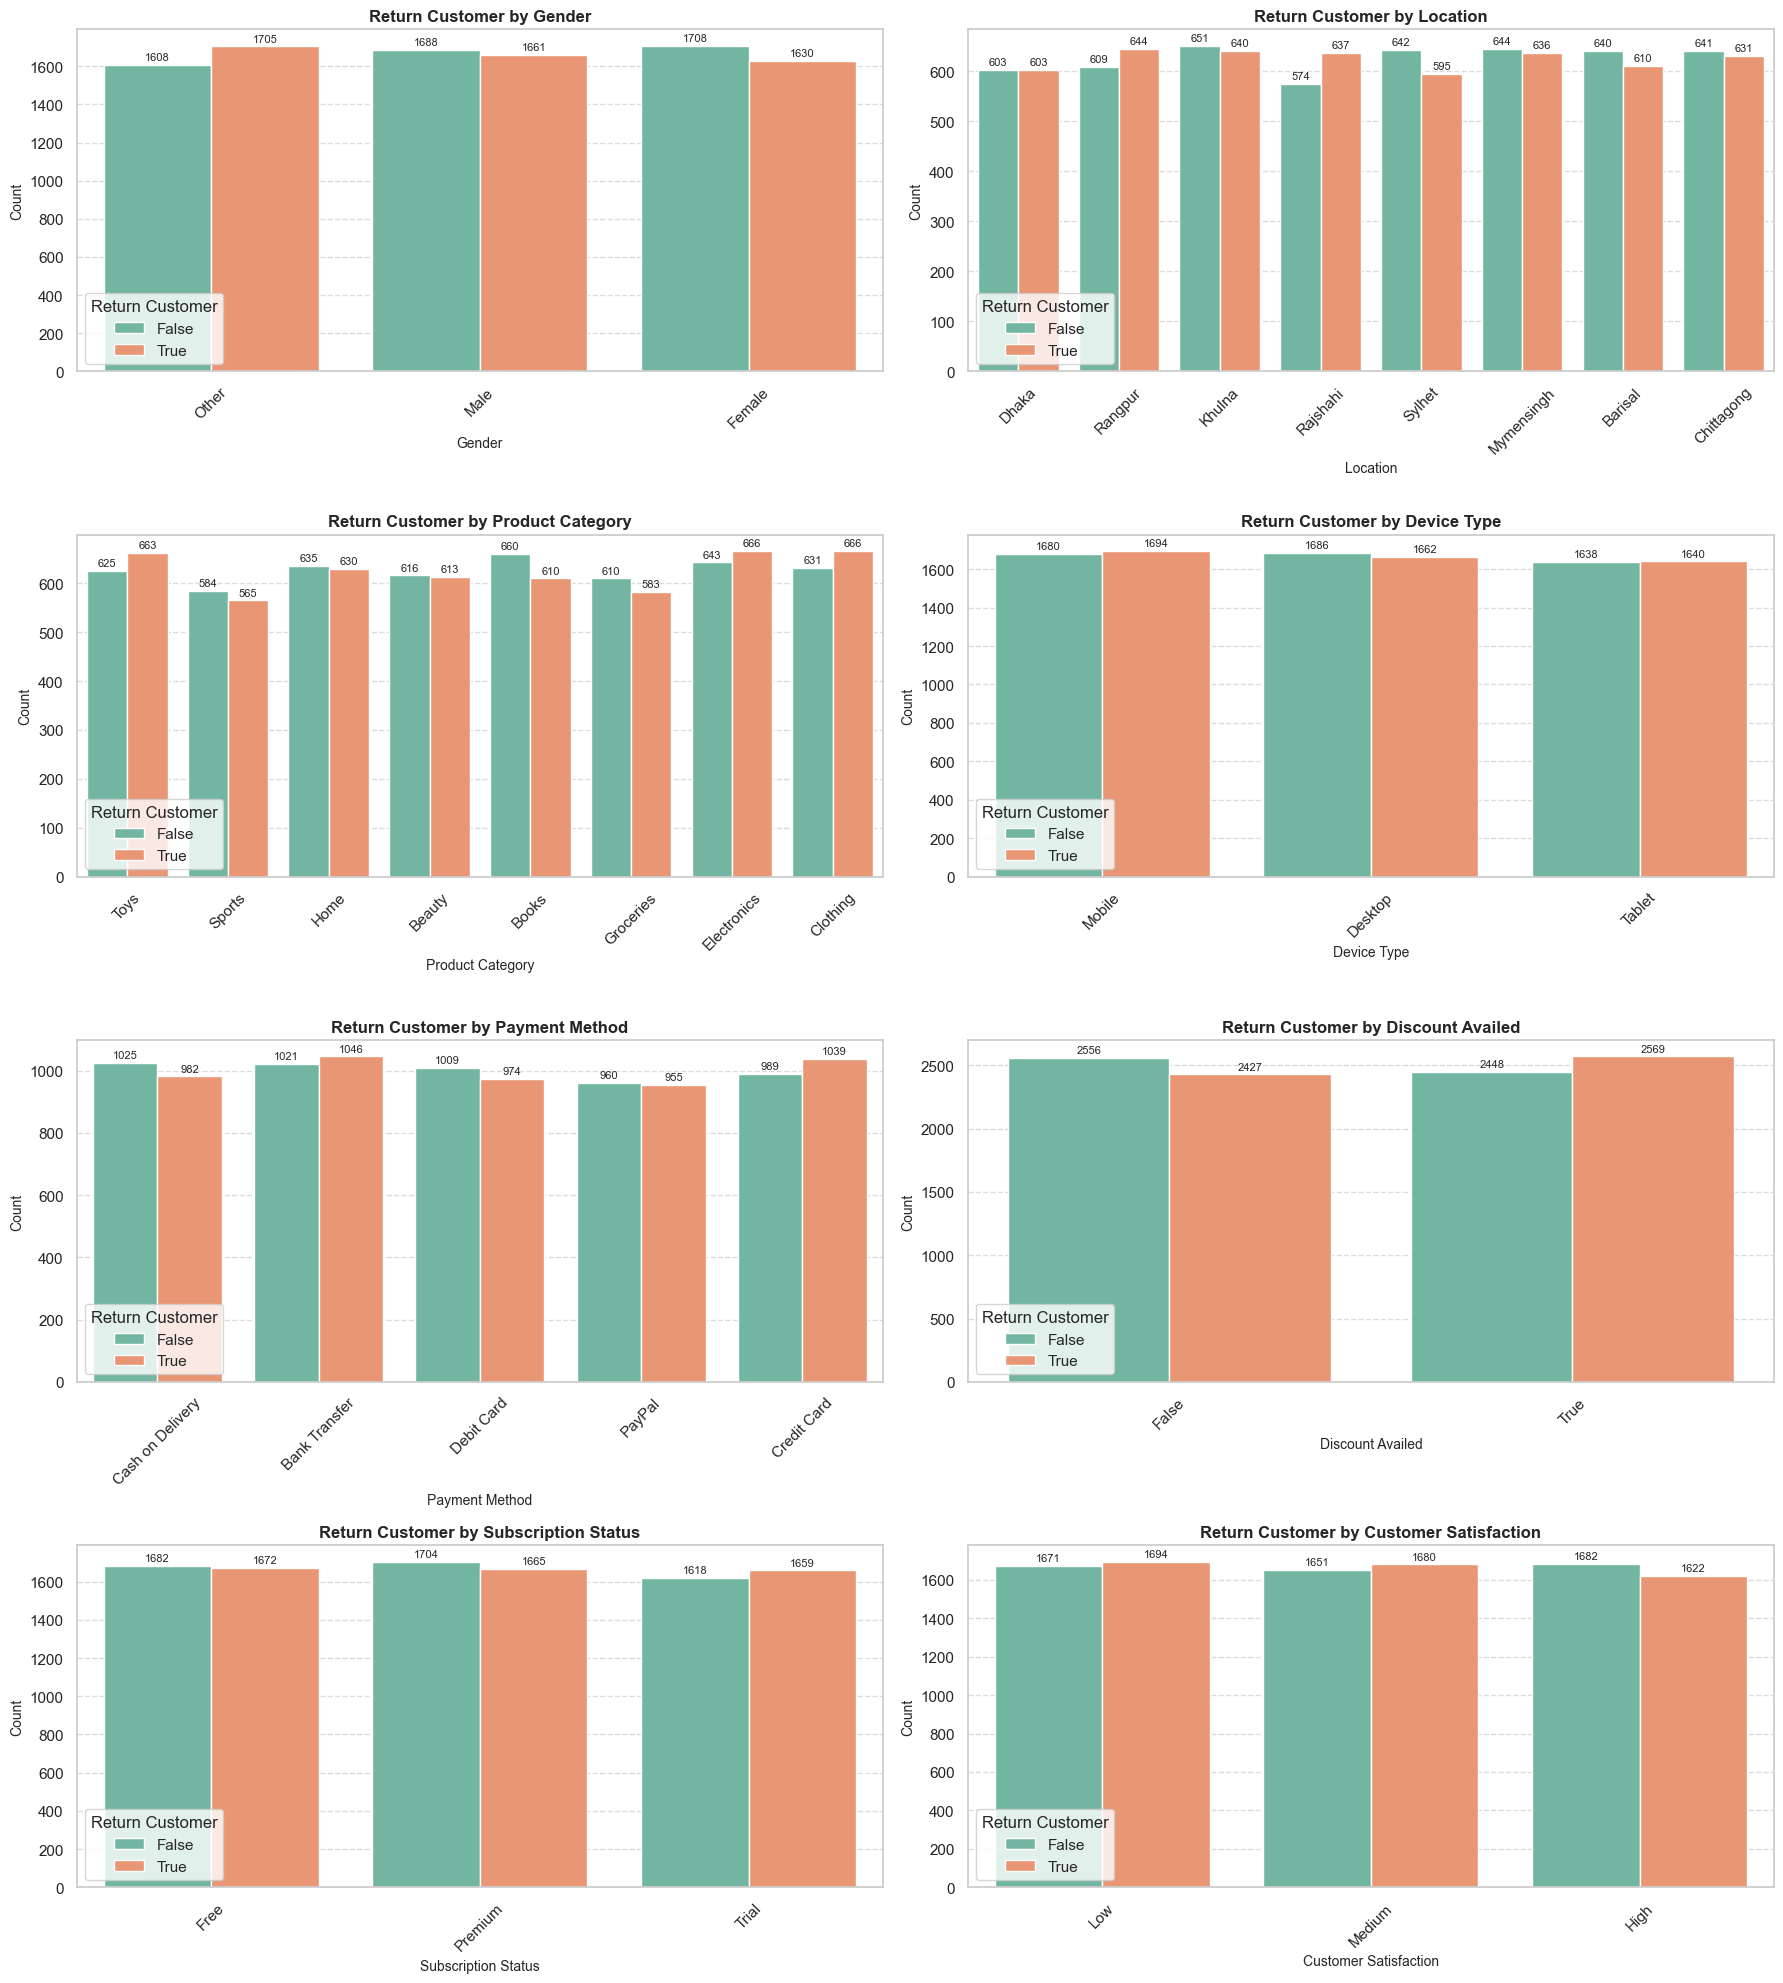

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = "Set2"

categorical_cols = [
    'Gender', 'Location', 'Product Category', 'Device Type', 
    'Payment Method', 'Discount Availed', 'Subscription Status',
    'Customer Satisfaction'
]

# Create a grid of subplots (4 rows × 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Return Customer', palette=palette, ax=ax)

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=8)

    ax.set_title(f'Return Customer by {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(title='Return Customer')

# Hide any unused subplots if len(categorical_cols) < len(axes)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



🔍 Key Insights (based on visual differences):
1. Discount Availed

Significant difference: A larger number of return customers have availed discounts.

Insight: Discounts are a strong incentive for customers to return. Offering discounts can significantly improve retention.



2. Customer Satisfaction

Noticeable difference: Customers with high satisfaction are more likely to be return customers.

Insight: Customer experience and satisfaction are crucial to loyalty and returning behavior.



3. Subscription Status

Return customers are slightly more frequent among premium and trial subscribers compared to free users.

Insight: Premium or trial experiences may lead to higher retention rates, possibly due to better service or perceived value.



4. Device Type

Tablet users have slightly more return customers than others.

Insight: Device usage pattern might be tied to engagement behavior. Tablet users could be more engaged or shop more leisurely.



🟨 Moderate Influence Factors:

5. Product Category

Some categories (like Books, Groceries) show higher return customer counts than others like Toys or Sports.

Insight: Repeatable needs (like groceries or books) may lead to more frequent return visits.



6. Payment Method

Slight preference for Credit Card and Digital Wallets among return customers.

Insight: Frictionless or trusted payment methods may improve return likelihood.



⬜ Less Influential or Neutral Factors:

7. Gender

Nearly equal distribution between genders across return status.

Insight: Gender doesn’t significantly influence return behavior here.



8. Location

No significant variation across cities.



Insight: Return customer rates are fairly uniform geographically.

✅ Conclusion:

The most influential factors for a customer being a return customer appear to be:

Discount Availed

Customer Satisfaction

Subscription Status

Numerical Variables

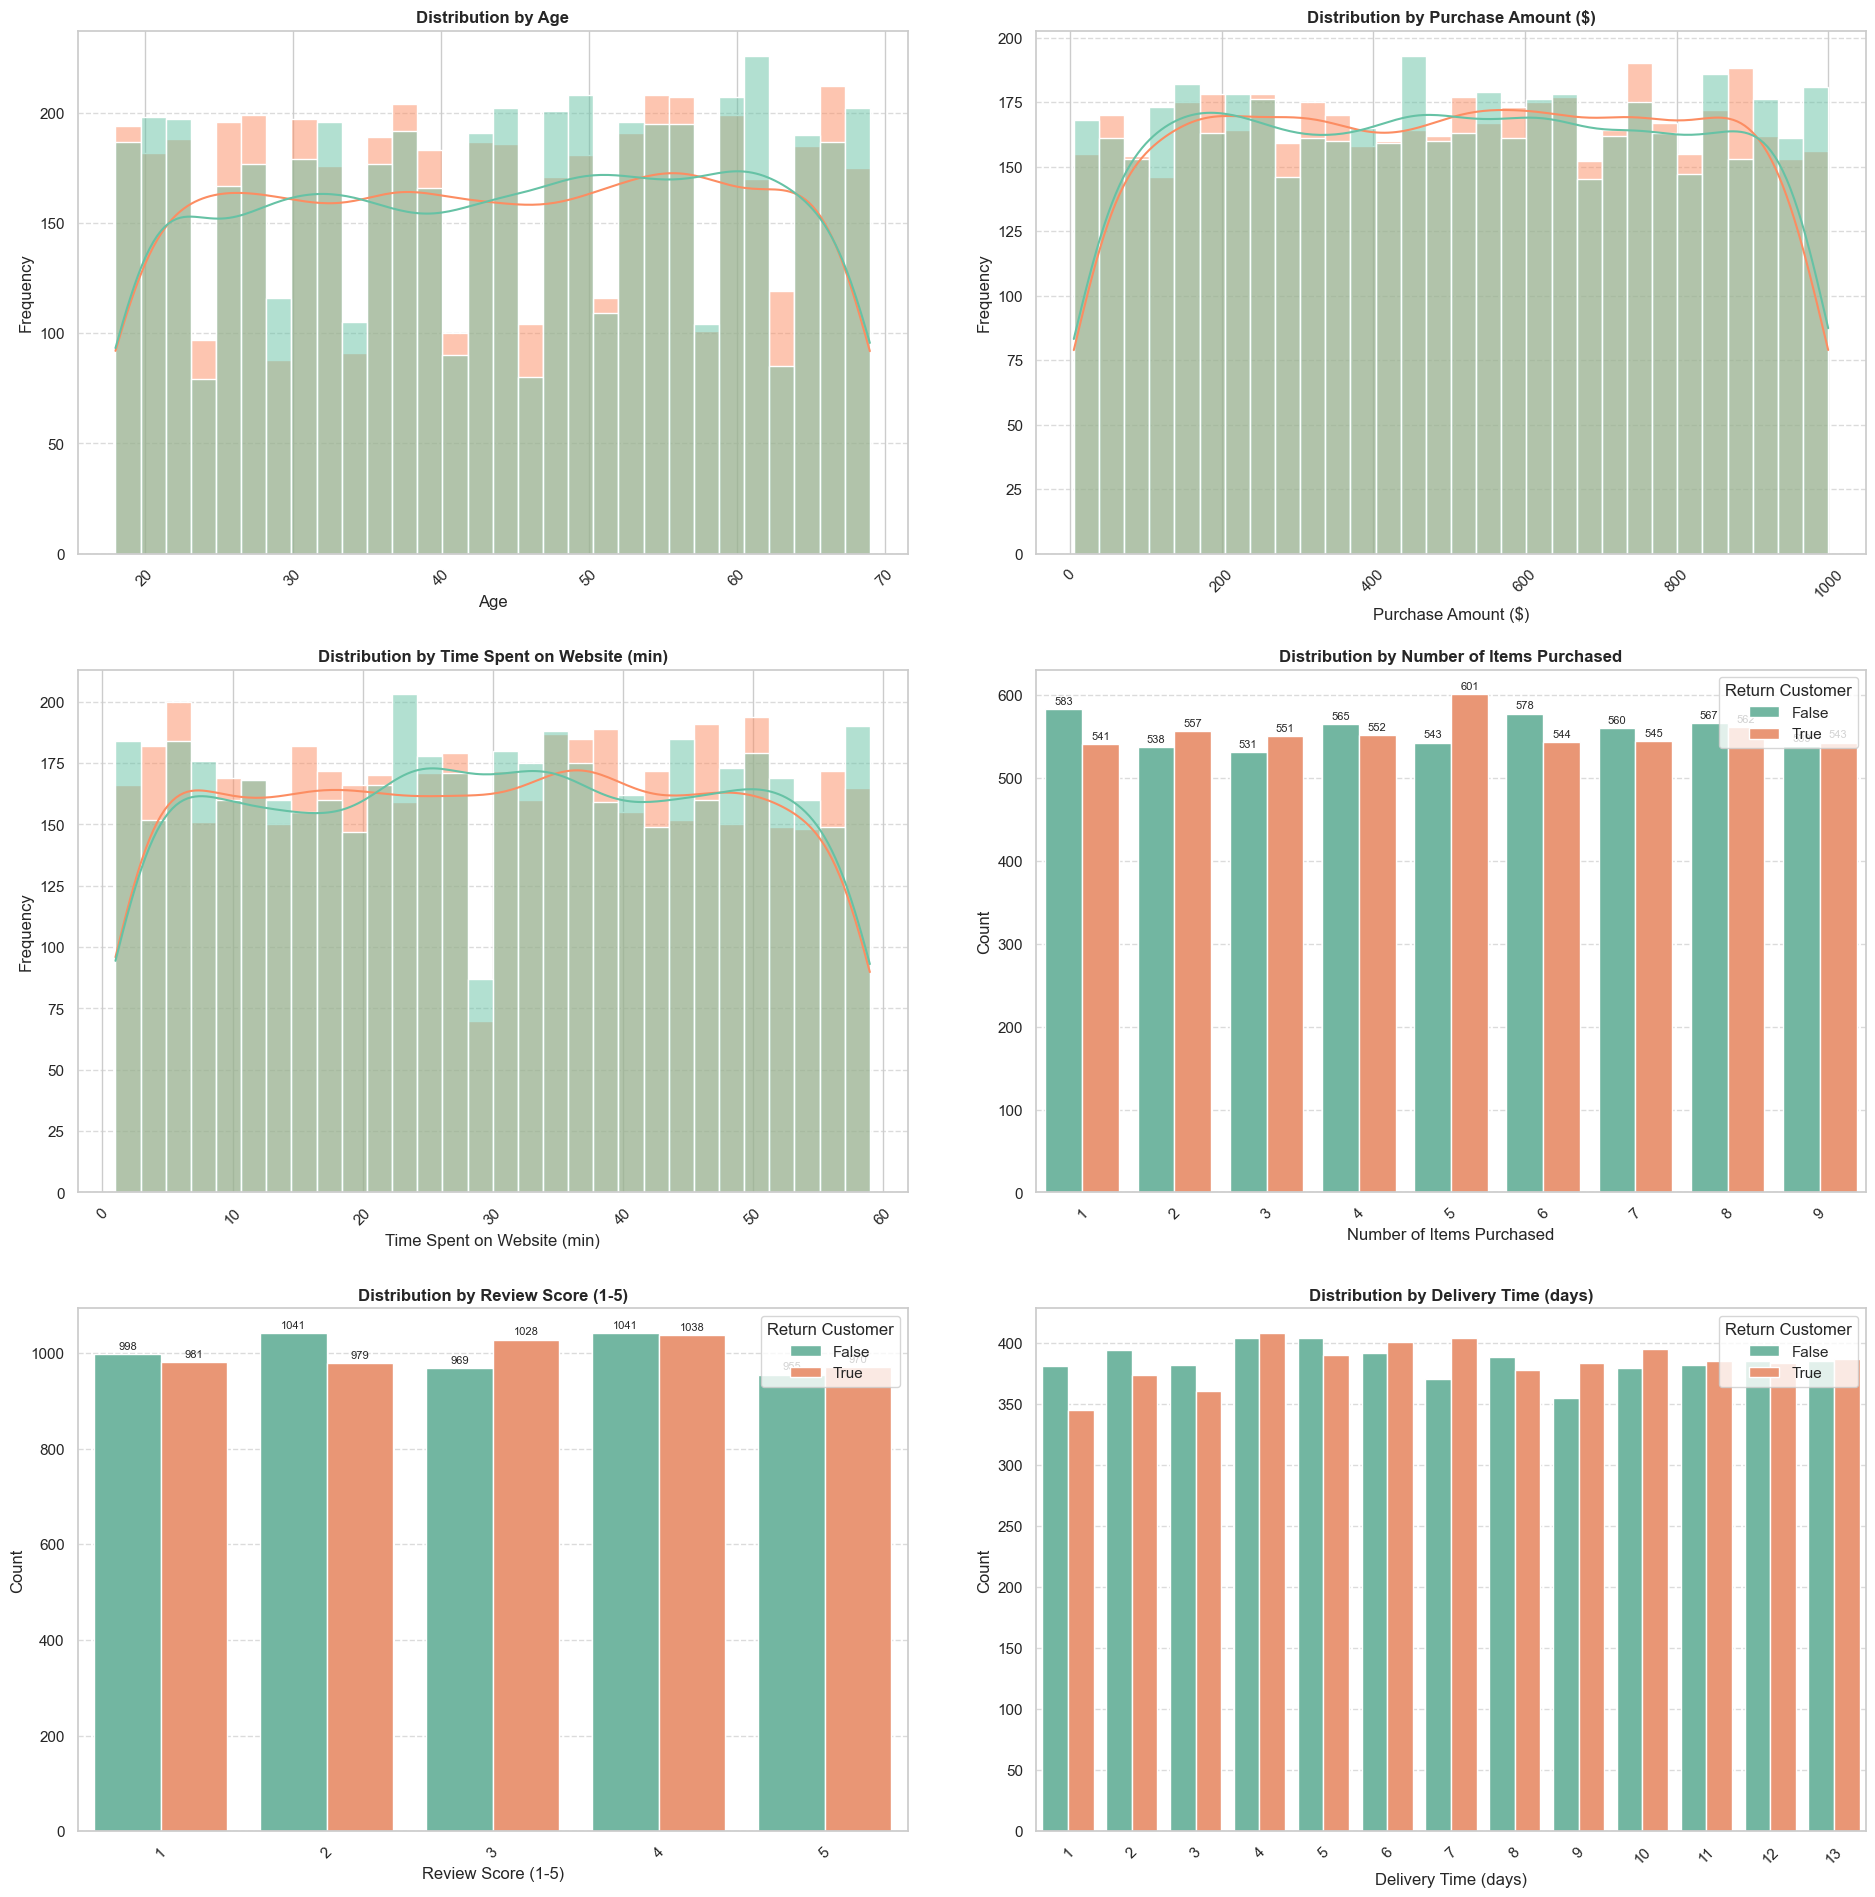

In [13]:
numerical_cols = ['Age', 'Purchase Amount ($)', 'Time Spent on Website (min)', 
                 'Number of Items Purchased', 'Review Score (1-5)', 
                 'Delivery Time (days)']

sns.set(style="whitegrid")  # Clean background
palette = "Set2"  # Soft, distinct colors

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.tight_layout(pad=5.0)  # Add padding between subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    temp_df = df[[col, 'Return Customer']].dropna()
    
    # Plot based on uniqueness
    if temp_df[col].nunique() < 20:
        sns.countplot(data=temp_df, x=col, hue='Return Customer', palette=palette, ax=ax)
        # Add data labels if not too many
        if temp_df[col].nunique() < 10:
            for container in ax.containers:
                ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=8)
        ax.set_ylabel("Count")
    else:
        sns.histplot(data=temp_df, x=col, hue='Return Customer', kde=True, bins=30, palette=palette, ax=ax)
        ax.set_ylabel("Frequency")
    
    # Common plot settings
    ax.set_xlabel(col)
    ax.set_title(f'Distribution by {col}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Legend cleanup
    handles, labels = ax.get_legend_handles_labels()
    if len(labels) > 0:
        ax.legend(title='Return Customer', loc='upper right')
    else:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

# Remove any empty subplots if we have an odd number of columns
if len(numerical_cols) < len(axes):
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j])

plt.show()


   



1. Number of Items Purchased

This shows the strongest visual difference between return and non-return customers.

Return customers tend to buy more items: the count of return customers increases as the number of items purchased increases (especially visible from 5 to 10 items).

Insight: Higher number of items purchased is a strong indicator of return customer behavior.

2. Review Score (1–5)

Return customers mostly give higher review scores, especially at scores 4 and 5.

Non-return customers are more evenly distributed across all scores.

Insight: High satisfaction/review score is a strong positive indicator for repeat customers.

3. Delivery Time (days)

Return customers are slightly more frequent at shorter delivery times (1–4 days).

The count difference narrows at longer delivery durations.

Insight: Faster delivery time may slightly influence customers to return.

4. Purchase Amount ($)

The distribution is fairly even, but return customers have slightly higher frequencies in middle to higher price ranges.

Insight: Moderate to high purchase amounts may relate to return behavior, but it's not a very strong factor.

5. Time Spent on Website (min)

There's no significant difference in time spent between return and non-return customers.

Insight: Time spent alone does not strongly predict return behavior.

6. Age

Age distribution is broad and doesn't show a major difference between groups.

Insight: Age does not appear to be a major influencing factor.

### Q2: How do payment methods influence customer satisfaction and return rates?

In [15]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [24]:
df1=df[["Payment Method","Customer Satisfaction","Return Customer"]]
df1.head()

,Payment Method,Customer Satisfaction,Return Customer
0,Cash on Delivery,Low,True
1,Bank Transfer,Medium,False
2,Bank Transfer,Medium,True
3,Bank Transfer,Medium,True
4,Debit Card,High,True


In [25]:
#pip install scikit-learn

In [30]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
cols_to_encode = ["Payment Method", "Customer Satisfaction", "Return Customer"]

for col in cols_to_encode:
    # Use .loc to explicitly modify the DataFrame
    df1.loc[:, f"{col}_num"] = le.fit_transform(df1[col])

df1.head()

,Payment Method,Customer Satisfaction,Return Customer,Payment Method_num,Customer Satisfaction_num,Return Customer_num
0,Cash on Delivery,Low,True,1,1,1
1,Bank Transfer,Medium,False,0,2,0
2,Bank Transfer,Medium,True,0,2,1
3,Bank Transfer,Medium,True,0,2,1
4,Debit Card,High,True,3,0,1


In [20]:
df2=df1[["Payment Method_num","Customer Satisfaction_num","Return Customer_num"]]
df2.head()

,Payment Method_num,Customer Satisfaction_num,Return Customer_num
0,1,1,1
1,0,2,0
2,0,2,1
3,0,2,1
4,3,0,1


In [31]:

correlation_matrix = df2[['Payment Method_num', 'Customer Satisfaction_num', 'Return Customer_num']].corr()

# Extract the specific correlations you're interested in
payment_satisfaction_corr = correlation_matrix.loc['Payment Method_num', 'Customer Satisfaction_num']
payment_return_corr = correlation_matrix.loc['Payment Method_num', 'Customer Satisfaction_num']

print("Correlation Matrix:")
print(correlation_matrix)
print("\nSpecific Correlations:")
print(f"Payment Method vs Customer Satisfaction: {payment_satisfaction_corr:.3f}")
print(f"Payment Method vs Return Customer: {payment_return_corr:.3f}")

Correlation Matrix:
                           Payment Method_num  Customer Satisfaction_num  \
Payment Method_num                   1.000000                   0.011476   
Customer Satisfaction_num            0.011476                   1.000000   
Return Customer_num                 -0.003704                   0.010929   

                           Return Customer_num  
Payment Method_num                   -0.003704  
Customer Satisfaction_num             0.010929  
Return Customer_num                   1.000000  

Specific Correlations:
Payment Method vs Customer Satisfaction: 0.011
Payment Method vs Return Customer: 0.011


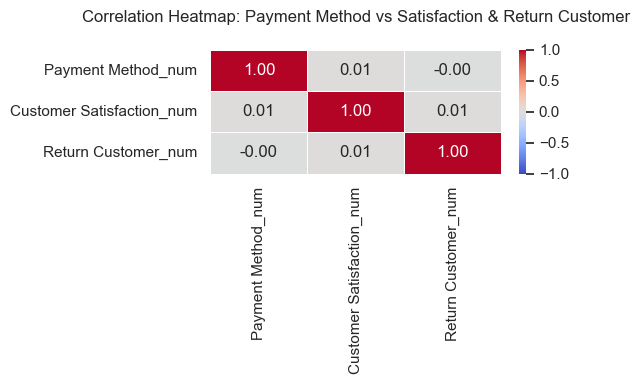

In [32]:

# Select the relevant columns
corr_data = df2[['Payment Method_num', 'Customer Satisfaction_num', 'Return Customer_num']]

# Compute the correlation matrix
correlation_matrix = corr_data.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True,       # Show correlation values in cells
    cmap='coolwarm',  # Color scheme (blue-red)
    vmin=-1,         # Minimum correlation value
    vmax=1,          # Maximum correlation value
    linewidths=0.5,  # Add lines between cells
    fmt=".2f"        # Format to 2 decimal places
)

# Customize the plot
plt.title("Correlation Heatmap: Payment Method vs Satisfaction & Return Customer", pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

# Display the plot
plt.tight_layout()
plt.show()


Here are the insights derived from the heatmap:

Payment Method vs. Customer Satisfaction:

 The correlation coefficient is 0.01, which is very close to zero. This indicates an extremely weak positive correlation, suggesting that there is practically no linear relationship between the payment method used and customer satisfaction. In other words, the choice of payment method doesn't seem to significantly influence how satisfied a customer is.

Payment Method vs. Return Customer:

 The correlation coefficient is -0.00, which is also extremely close to zero. This signifies an extremely weak negative correlation, implying that there is essentially no linear relationship between the payment method and whether a customer becomes a return customer. The payment method used does not appear to have an impact on customer retention.

Customer Satisfaction vs. Return Customer:

 The correlation coefficient is 0.01, again very close to zero. This indicates a very weak positive correlation, suggesting that there's almost no linear relationship between customer satisfaction and whether a customer becomes a return customer. This is a surprising insight, as one might intuitively expect higher satisfaction to lead to higher rates of return customers. However, based on this data, other factors are likely more influential in determining if a customer returns.



In summary, the most significant insight is the very low correlation values across all pairs of different variables

### Q3: How does the location influence both purchase amount and delivery time?

In [77]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-score (Purchase Amount),Time Bins,satisfaction_numeric
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052856,"(35.8, 47.4]",0
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531219,"(24.2, 35.8]",1
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606287,"(0.942, 12.6]",1
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063945,"(35.8, 47.4]",1
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259932,"(12.6, 24.2]",2


In [78]:
df["Location"]

0            Dhaka
1          Rangpur
2           Khulna
3         Rajshahi
4          Rangpur
           ...    
9995    Chittagong
9996       Rangpur
9997    Mymensingh
9998        Khulna
9999        Khulna
Name: Location, Length: 10000, dtype: object

In [79]:
location_stats = df.groupby('Location')[['Purchase Amount ($)', 'Delivery Time (days)']].mean().sort_values(by='Purchase Amount ($)', ascending=False)
print(location_stats)

            Purchase Amount ($)  Delivery Time (days)
Location                                             
Khulna               513.937072              6.811774
Barisal              513.674560              7.072800
Mymensingh           507.892211              7.099219
Chittagong           507.851675              7.020440
Dhaka                502.002504              6.941957
Rajshahi             495.544649              7.113130
Sylhet               494.976427              7.018593
Rangpur              494.368867              7.031125


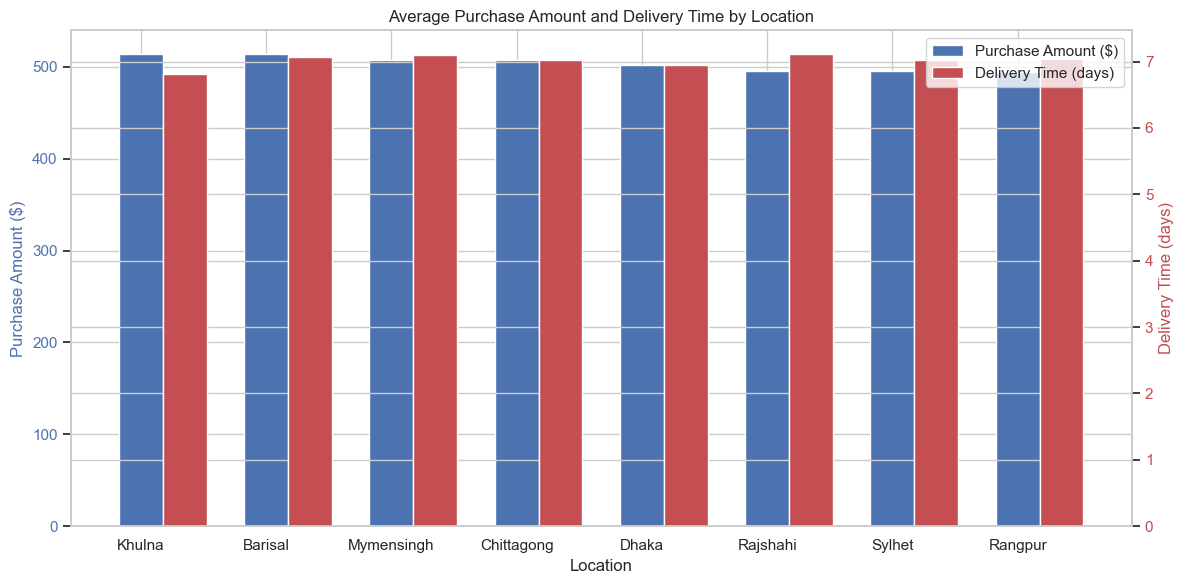

In [80]:

# Assuming location_stats is already calculated as shown in your code
location_stats = df.groupby('Location')[['Purchase Amount ($)', 'Delivery Time (days)']].mean().sort_values(by='Purchase Amount ($)', ascending=False)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get locations and values
locations = location_stats.index
purchase_amounts = location_stats['Purchase Amount ($)']
delivery_times = location_stats['Delivery Time (days)']

# Bar width
width = 0.35

# Create bars for Purchase Amount on primary axis
bars1 = ax1.bar(locations, purchase_amounts, width, color='b', label='Purchase Amount ($)')
ax1.set_xlabel('Location')
ax1.set_ylabel('Purchase Amount ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary axis for Delivery Time
ax2 = ax1.twinx()
bars2 = ax2.bar([x + width for x in range(len(locations))], delivery_times, width, color='r', label='Delivery Time (days)')
ax2.set_ylabel('Delivery Time (days)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and layout
plt.title('Average Purchase Amount and Delivery Time by Location')
fig.tight_layout()

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.show()

The data shows variations in both purchase amounts and delivery times across different locations in Bangladesh. Here's how location influences these two factors:

Purchase Amount ($)
Highest Purchase Amount: Khulna ($513.94) and Barisal ($513.67) have the highest average purchase amounts.

Lowest Purchase Amount: Rangpur ($494.37) and Sylhet ($494.98) have the lowest average purchase amounts.

General Trend: Larger cities like Dhaka ($502.00) and Chittagong ($507.85) fall in the middle range, while smaller or less economically prominent regions (e.g., Rajshahi, Rangpur, Sylhet) tend to have lower purchase amounts.

Possible Reasons:

Regional economic disparities (e.g., higher spending power in Khulna/Barisal).

Differences in product preferences or pricing strategies by location.

Urban vs. rural consumer behavior (e.g., Dhaka’s mid-range values may reflect diverse demographics).

Delivery Time (days)
Fastest Delivery: Dhaka (6.94 days) and Khulna (6.81 days) have the shortest delivery times.

Slowest Delivery: Mymensingh (7.10 days) and Rajshahi (7.11 days) have the longest delivery times.

General Trend: Delivery times cluster closely between 6.81–7.11 days, with minor variations. Dhaka and Khulna may benefit from better logistics infrastructure.

Possible Reasons:

Proximity to distribution hubs (e.g., Dhaka as a commercial center likely has optimized logistics).

Remote or less accessible locations (e.g., Mymensingh, Rajshahi) may face logistical challenges.

Key Observations
No Direct Correlation: Locations with higher purchase amounts (e.g., Khulna) do not consistently have faster/slower delivery times, suggesting these metrics are influenced by separate factors.

Dhaka’s Middle Ground: Despite being a major city, Dhaka’s purchase amount is mid-range, possibly due to high competition or diverse customer segments, but it enjoys relatively fast deliveries.

Regional Patterns: Smaller cities (Rangpur, Sylhet) lag in both metrics, possibly due to lower demand or infrastructure limitations.

Conclusion
Location significantly impacts both purchase behavior and delivery efficiency, but the drivers differ:

Purchase Amount: Likely tied to regional economic activity and consumer demographics.

Delivery Time: More dependent on logistical infrastructure and geographic accessibility.